In [49]:
!pip install shap

In [50]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [51]:
import io

In [52]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [53]:
df= pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0     6/30/2010   1.719333   2.028000   1.553333   1.588667   1.588667   
1      7/1/2010   1.666667   1.728000   1.351333   1.464000   1.464000   
2      7/2/2010   1.533333   1.540000   1.247333   1.280000   1.280000   
3      7/6/2010   1.333333   1.333333   1.055333   1.074000   1.074000   
4      7/7/2010   1.093333   1.108667   0.998667   1.053333   1.053333   
...         ...        ...        ...        ...        ...        ...   
2512  6/23/2020  66.592003  67.466667  66.267334  66.785332  66.785332   
2513  6/24/2020  66.274002  66.725334  63.542667  64.056664  64.056664   
2514  6/25/2020  63.618000  65.732002  62.476665  65.732002  65.732002   
2515  6/26/2020  66.318665  66.333336  63.658001  63.982666  63.982666   
2516  6/29/2020  64.600670  67.333336  63.234669  67.290001  67.290001   

        Average  
0      1.695600  
1      1.534800  
2      1.376133  
3      1.174000  
4      1.061467  
...

In [54]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,1.719333,2.028000,1.553333,1.588667,1.588667,1.695600
1,1.666667,1.728000,1.351333,1.464000,1.464000,1.534800
2,1.533333,1.540000,1.247333,1.280000,1.280000,1.376133
3,1.333333,1.333333,1.055333,1.074000,1.074000,1.174000
4,1.093333,1.108667,0.998667,1.053333,1.053333,1.061467


In [55]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6
           7       0.00      0.00      0.00         0
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        37
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        26
          17       1.00      1.00      1.00        19
          18       1.00      1.00      1.00        11
          19       0.90      1.00      0.95         9
          20       1.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [60]:
y_pred = classifier.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  0  0 ...  0  0  0]
 [20 23  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


0.3201058201058201

In [62]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


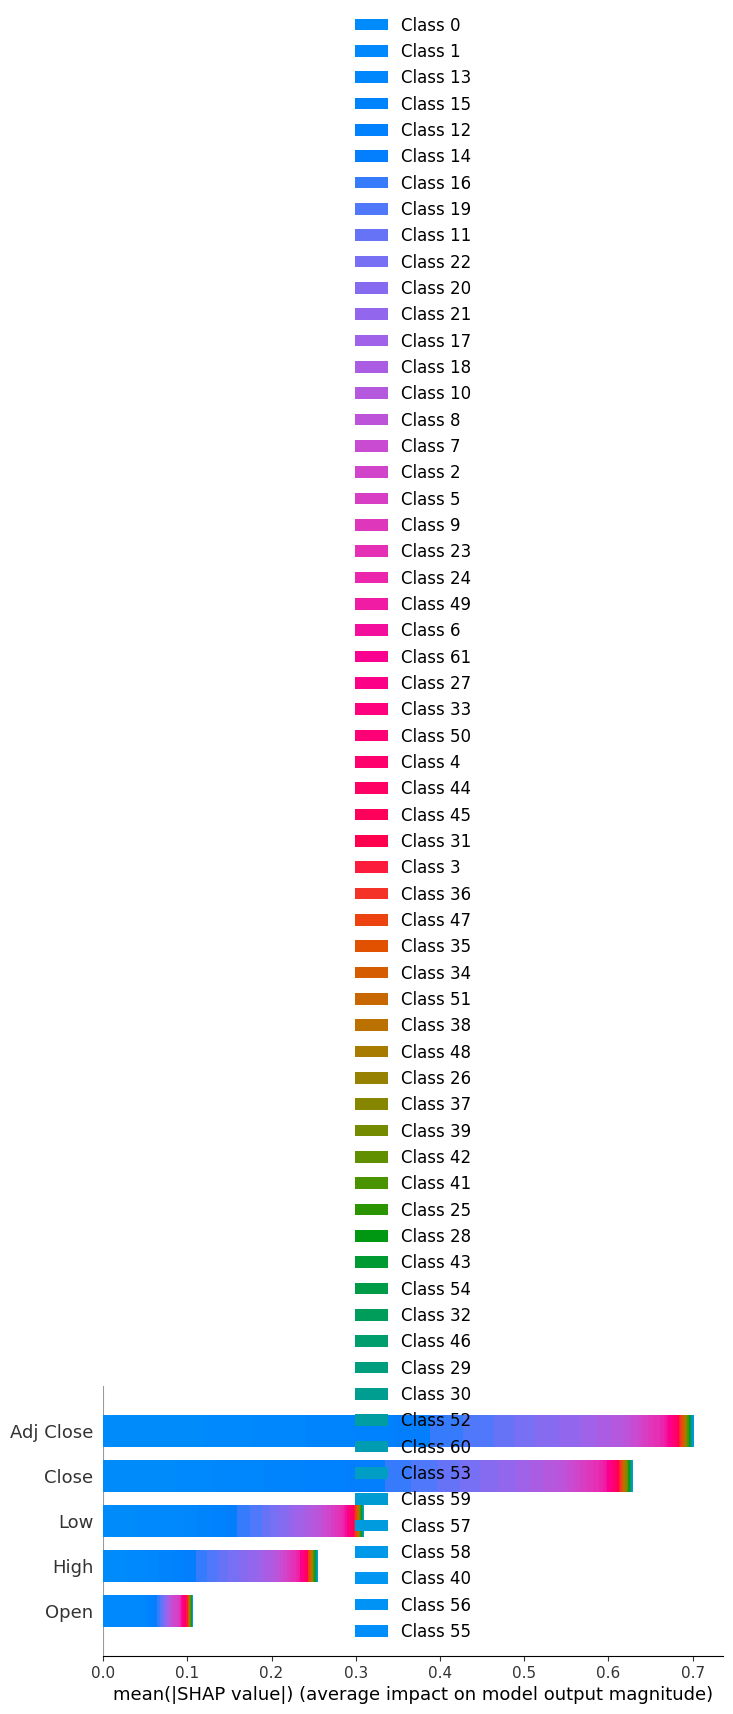

In [63]:
shap.summary_plot(shap_values, x_test)